In [105]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot as plt
import numpy as np


In [106]:
a = np.random.rand(944)
a = pd.Series(a)


KeyError: -189

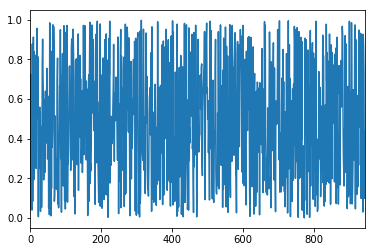

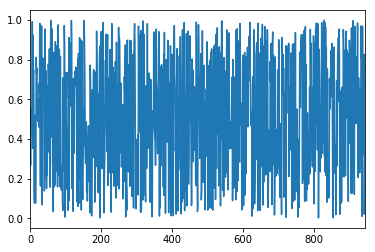

In [77]:
a.plot()
plt.show()

In [78]:
diff = list()
for i in range(1, len(a)):
    value = a[i] - a[i - 1]
    diff.append(value)
X = pd.Series(diff)
print(X.head())

0   -0.093801
1    0.092641
2    0.197127
3   -0.103899
4    0.001973
dtype: float64


In [79]:
df = pd.DataFrame(X)
columns = [df.shift(i) for i in range(1,2)]
columns.append(df)
df = pd.concat(columns, axis=1)
df.fillna(0, inplace=True)
X = df
supervised_values = X.values
print(supervised_values[1:5])


[[-0.09380099  0.09264058]
 [ 0.09264058  0.19712664]
 [ 0.19712664 -0.10389854]
 [-0.10389854  0.00197347]]


In [82]:
train_size = int(len(supervised_values) * 0.80)
test_size = len(supervised_values) - train_size
train, test = supervised_values[0:train_size,:], supervised_values[train_size:len(supervised_values),:]


In [84]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler = scaler.fit(train)    

In [89]:
train = train.reshape(train.shape[0],train.shape[1])
train_scale = scaler.transform(train)

In [91]:
test = test.reshape(test.shape[0],test.shape[1])
test_scale = scaler.transform(test)

In [92]:
X, y = train_scale[:, 0:-1], train_scale[:, -1]
print(X.shape)

(754, 1)


In [93]:
X = X.reshape(X.shape[0], 1, X.shape[1])
model = Sequential()
model.add(LSTM(4,batch_input_shape=(1, X.shape[1], X.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='SGD')
for i in range(5):
        model.fit(X, y, epochs=1, batch_size=1,  shuffle=False)
        model.reset_states()
        print(i)


Epoch 1/1


  1/754 [..............................] - ETA: 12:24 - loss: 0.0095

 28/754 [>.............................] - ETA: 26s - loss: 0.1366  

 48/754 [>.............................] - ETA: 16s - loss: 0.1819

 59/754 [=>............................] - ETA: 13s - loss: 0.1862

 73/754 [=>............................] - ETA: 11s - loss: 0.2174

 94/754 [==>...........................] - ETA: 8s - loss: 0.2244 

129/754 [====>.........................] - ETA: 6s - loss: 0.2191

157/754 [=====>........................] - ETA: 5s - loss: 0.2272

184/754 [======>.......................] - ETA: 4s - loss: 0.2200



213/754 [=======>......................] - ETA: 3s - loss: 0.2124

235/754 [========>.....................] - ETA: 3s - loss: 0.2088

248/754 [========>.....................] - ETA: 3s - loss: 0.2092

262/754 [=========>....................] - ETA: 3s - loss: 0.2097

290/754 [==========>...................] - ETA: 2s - loss: 0.2112

335/754 [============>.................] - ETA: 2s - loss: 0.2143

362/754 [=============>................] - ETA: 1s - loss: 0.2055

376/754 [=============>................] - ETA: 1s - loss: 0.2056

393/754 [==============>...............] - ETA: 1s - loss: 0.2067

416/754 [===============>..............] - ETA: 1s - loss: 0.2063

436/754 [================>.............] - ETA: 1s - loss: 0.2081

446/754 [================>.............] - ETA: 1s - loss: 0.2080

481/754 [==================>...........] - ETA: 1s - loss: 0.2027

502/754 [==================>...........] - ETA: 1s - loss: 0.2020

514/754 [===================>..........] - ETA: 1s - loss: 0.2024

526/754 [===================>..........] - ETA: 0s - loss: 0.2035

546/754 [====================>.........] - ETA: 0s - loss: 0.2035

565/754 [=====================>........] - ETA: 0s - loss: 0.2007

584/754 [======================>.......] - ETA: 0s - loss: 0.2026

612/754 [=======================>......] - ETA: 0s - loss: 0.2010

636/754 [========================>.....] - ETA: 0s - loss: 0.1980

664/754 [=========================>....] - ETA: 0s - loss: 0.2010

692/754 [==========================>...] - ETA: 0s - loss: 0.2010

706/754 [===========================>..] - ETA: 0s - loss: 0.1990

731/754 [============================>.] - ETA: 0s - loss: 0.1985

754/754 [==============================] - 3s 4ms/step - loss: 0.1978


0
Epoch 1/1


  1/754 [..............................] - ETA: 1s - loss: 0.0077

 16/754 [..............................] - ETA: 2s - loss: 0.1178

 27/754 [>.............................] - ETA: 2s - loss: 0.0941

 39/754 [>.............................] - ETA: 2s - loss: 0.1227

 54/754 [=>............................] - ETA: 2s - loss: 0.1466

 76/754 [==>...........................] - ETA: 2s - loss: 0.1771

 96/754 [==>...........................] - ETA: 2s - loss: 0.1841

106/754 [===>..........................] - ETA: 2s - loss: 0.1853

117/754 [===>..........................] - ETA: 2s - loss: 0.1846

127/754 [====>.........................] - ETA: 2s - loss: 0.1832

141/754 [====>.........................] - ETA: 2s - loss: 0.1879

156/754 [=====>........................] - ETA: 2s - loss: 0.1899

172/754 [=====>........................] - ETA: 2s - loss: 0.1819

192/754 [======>.......................] - ETA: 1s - loss: 0.1799

233/754 [========>.....................] - ETA: 1s - loss: 0.1755

280/754 [==========>...................] - ETA: 1s - loss: 0.1749



306/754 [===========>..................] - ETA: 1s - loss: 0.1740

318/754 [===========>..................] - ETA: 1s - loss: 0.1798

326/754 [===========>..................] - ETA: 1s - loss: 0.1806

361/754 [=============>................] - ETA: 1s - loss: 0.1724

409/754 [===============>..............] - ETA: 0s - loss: 0.1740

443/754 [================>.............] - ETA: 0s - loss: 0.1747

454/754 [=================>............] - ETA: 0s - loss: 0.1740

466/754 [=================>............] - ETA: 0s - loss: 0.1722

478/754 [==================>...........] - ETA: 0s - loss: 0.1726

487/754 [==================>...........] - ETA: 0s - loss: 0.1727

501/754 [==================>...........] - ETA: 0s - loss: 0.1719

532/754 [====================>.........] - ETA: 0s - loss: 0.1733

565/754 [=====================>........] - ETA: 0s - loss: 0.1719

585/754 [======================>.......] - ETA: 0s - loss: 0.1729

597/754 [======================>.......] - ETA: 0s - loss: 0.1724

613/754 [=======================>......] - ETA: 0s - loss: 0.1725

642/754 [========================>.....] - ETA: 0s - loss: 0.1713

659/754 [=========================>....] - ETA: 0s - loss: 0.1727

675/754 [=========================>....] - ETA: 0s - loss: 0.1723

691/754 [==========================>...] - ETA: 0s - loss: 0.1732

722/754 [===========================>..] - ETA: 0s - loss: 0.1718

743/754 [============================>.] - ETA: 0s - loss: 0.1711

754/754 [==============================] - 2s 3ms/step - loss: 0.1707


1
Epoch 1/1


  1/754 [..............................] - ETA: 2s - loss: 0.0077

 17/754 [..............................] - ETA: 2s - loss: 0.1239

 38/754 [>.............................] - ETA: 2s - loss: 0.1178

 70/754 [=>............................] - ETA: 1s - loss: 0.1525

 97/754 [==>...........................] - ETA: 1s - loss: 0.1647

137/754 [====>.........................] - ETA: 1s - loss: 0.1660

158/754 [=====>........................] - ETA: 1s - loss: 0.1715

168/754 [=====>........................] - ETA: 1s - loss: 0.1636

181/754 [======>.......................] - ETA: 1s - loss: 0.1636

190/754 [======>.......................] - ETA: 1s - loss: 0.1637

210/754 [=======>......................] - ETA: 1s - loss: 0.1624

250/754 [========>.....................] - ETA: 1s - loss: 0.1636

282/754 [==========>...................] - ETA: 1s - loss: 0.1607

316/754 [===========>..................] - ETA: 0s - loss: 0.1616

326/754 [===========>..................] - ETA: 0s - loss: 0.1641

337/754 [============>.................] - ETA: 0s - loss: 0.1624

350/754 [============>.................] - ETA: 0s - loss: 0.1608

364/754 [=============>................] - ETA: 0s - loss: 0.1593

370/754 [=============>................] - ETA: 0s - loss: 0.1588

393/754 [==============>...............] - ETA: 0s - loss: 0.1578

412/754 [===============>..............] - ETA: 0s - loss: 0.1589

421/754 [===============>..............] - ETA: 0s - loss: 0.1586

430/754 [================>.............] - ETA: 0s - loss: 0.1587

442/754 [================>.............] - ETA: 0s - loss: 0.1606

454/754 [=================>............] - ETA: 0s - loss: 0.1601

466/754 [=================>............] - ETA: 0s - loss: 0.1585

475/754 [=================>............] - ETA: 0s - loss: 0.1598

489/754 [==================>...........] - ETA: 0s - loss: 0.1596

500/754 [==================>...........] - ETA: 0s - loss: 0.1594



519/754 [===================>..........] - ETA: 0s - loss: 0.1592

534/754 [====================>.........] - ETA: 0s - loss: 0.1603

549/754 [====================>.........] - ETA: 0s - loss: 0.1604

566/754 [=====================>........] - ETA: 0s - loss: 0.1595

580/754 [======================>.......] - ETA: 0s - loss: 0.1597

595/754 [======================>.......] - ETA: 0s - loss: 0.1601

614/754 [=======================>......] - ETA: 0s - loss: 0.1602

627/754 [=======================>......] - ETA: 0s - loss: 0.1583

645/754 [========================>.....] - ETA: 0s - loss: 0.1593

664/754 [=========================>....] - ETA: 0s - loss: 0.1606

682/754 [==========================>...] - ETA: 0s - loss: 0.1605

698/754 [==========================>...] - ETA: 0s - loss: 0.1602

716/754 [===========================>..] - ETA: 0s - loss: 0.1597

732/754 [============================>.] - ETA: 0s - loss: 0.1588

753/754 [============================>.] - ETA: 0s - loss: 0.1593

754/754 [==============================] - 2s 3ms/step - loss: 0.1593


2
Epoch 1/1
  1/754 [..............................] - ETA: 2s - loss: 0.0075

 21/754 [..............................] - ETA: 1s - loss: 0.1012

 39/754 [>.............................] - ETA: 1s - loss: 0.1126

 57/754 [=>............................] - ETA: 2s - loss: 0.1335

 70/754 [=>............................] - ETA: 2s - loss: 0.1471

 84/754 [==>...........................] - ETA: 2s - loss: 0.1616

100/754 [==>...........................] - ETA: 2s - loss: 0.1675

117/754 [===>..........................] - ETA: 2s - loss: 0.1594

127/754 [====>.........................] - ETA: 2s - loss: 0.1593

138/754 [====>.........................] - ETA: 2s - loss: 0.1611

150/754 [====>.........................] - ETA: 2s - loss: 0.1689

164/754 [=====>........................] - ETA: 2s - loss: 0.1606

181/754 [======>.......................] - ETA: 2s - loss: 0.1572

195/754 [======>.......................] - ETA: 1s - loss: 0.1552

207/754 [=======>......................] - ETA: 1s - loss: 0.1570

226/754 [=======>......................] - ETA: 1s - loss: 0.1543

244/754 [========>.....................] - ETA: 1s - loss: 0.1562

262/754 [=========>....................] - ETA: 1s - loss: 0.1546

291/754 [==========>...................] - ETA: 1s - loss: 0.1542



306/754 [===========>..................] - ETA: 1s - loss: 0.1534

316/754 [===========>..................] - ETA: 1s - loss: 0.1549

326/754 [===========>..................] - ETA: 1s - loss: 0.1572

336/754 [============>.................] - ETA: 1s - loss: 0.1551

346/754 [============>.................] - ETA: 1s - loss: 0.1555

361/754 [=============>................] - ETA: 1s - loss: 0.1522

375/754 [=============>................] - ETA: 1s - loss: 0.1516

388/754 [==============>...............] - ETA: 1s - loss: 0.1515

399/754 [==============>...............] - ETA: 1s - loss: 0.1532

411/754 [===============>..............] - ETA: 1s - loss: 0.1529

421/754 [===============>..............] - ETA: 1s - loss: 0.1529

433/754 [================>.............] - ETA: 1s - loss: 0.1532

446/754 [================>.............] - ETA: 1s - loss: 0.1557

467/754 [=================>............] - ETA: 1s - loss: 0.1528

486/754 [==================>...........] - ETA: 0s - loss: 0.1546

516/754 [===================>..........] - ETA: 0s - loss: 0.1544

551/754 [====================>.........] - ETA: 0s - loss: 0.1556

576/754 [=====================>........] - ETA: 0s - loss: 0.1544

587/754 [======================>.......] - ETA: 0s - loss: 0.1556

595/754 [======================>.......] - ETA: 0s - loss: 0.1555

607/754 [=======================>......] - ETA: 0s - loss: 0.1565

624/754 [=======================>......] - ETA: 0s - loss: 0.1537

649/754 [========================>.....] - ETA: 0s - loss: 0.1549

665/754 [=========================>....] - ETA: 0s - loss: 0.1561

674/754 [=========================>....] - ETA: 0s - loss: 0.1561

686/754 [==========================>...] - ETA: 0s - loss: 0.1564

698/754 [==========================>...] - ETA: 0s - loss: 0.1558

715/754 [===========================>..] - ETA: 0s - loss: 0.1554

732/754 [============================>.] - ETA: 0s - loss: 0.1544

754/754 [==============================] - 2s 3ms/step - loss: 0.1550


3
Epoch 1/1
  1/754 [..............................] - ETA: 6s - loss: 0.0073

 23/754 [..............................] - ETA: 1s - loss: 0.0931

 49/754 [>.............................] - ETA: 1s - loss: 0.1317

 76/754 [==>...........................] - ETA: 1s - loss: 0.1458

 89/754 [==>...........................] - ETA: 1s - loss: 0.1562

100/754 [==>...........................] - ETA: 1s - loss: 0.1657

112/754 [===>..........................] - ETA: 1s - loss: 0.1617

141/754 [====>.........................] - ETA: 1s - loss: 0.1616

171/754 [=====>........................] - ETA: 1s - loss: 0.1579

209/754 [=======>......................] - ETA: 1s - loss: 0.1546

232/754 [========>.....................] - ETA: 1s - loss: 0.1548

244/754 [========>.....................] - ETA: 1s - loss: 0.1545

263/754 [=========>....................] - ETA: 1s - loss: 0.1523

287/754 [==========>...................] - ETA: 1s - loss: 0.1525

303/754 [===========>..................] - ETA: 1s - loss: 0.1507

326/754 [===========>..................] - ETA: 1s - loss: 0.1547

346/754 [============>.................] - ETA: 0s - loss: 0.1535

375/754 [=============>................] - ETA: 0s - loss: 0.1498

401/754 [==============>...............] - ETA: 0s - loss: 0.1515

430/754 [================>.............] - ETA: 0s - loss: 0.1512

442/754 [================>.............] - ETA: 0s - loss: 0.1530

459/754 [=================>............] - ETA: 0s - loss: 0.1531

493/754 [==================>...........] - ETA: 0s - loss: 0.1530

519/754 [===================>..........] - ETA: 0s - loss: 0.1530

552/754 [====================>.........] - ETA: 0s - loss: 0.1538

581/754 [======================>.......] - ETA: 0s - loss: 0.1532

610/754 [=======================>......] - ETA: 0s - loss: 0.1551

625/754 [=======================>......] - ETA: 0s - loss: 0.1525

643/754 [========================>.....] - ETA: 0s - loss: 0.1539

677/754 [=========================>....] - ETA: 0s - loss: 0.1544

710/754 [===========================>..] - ETA: 0s - loss: 0.1543

735/754 [============================>.] - ETA: 0s - loss: 0.1526

754/754 [==============================] - 2s 2ms/step - loss: 0.1537


4


In [114]:
#train_reshaped = train_scale[:, 0].reshape(len(train_scale), 1, 1)
#model.predict(train_reshaped, batch_size=1)

prediction =[] 
a = np.array(a)
for i in range(len(test_scale)):
    X, y = test_scale[i, 0:-1], test_scale[i, -1]
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=1)
    new_row = [x for x in X] + [yhat]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    yhat = inverted[0,-1]
    interval = len(test_scale) + 1 - i
    yhat2 = yhat + a[-interval]
    prediction.append(yhat2)
    expected = a[len(train) + i + 1]
    print('Month=%d, Predicted=%f, Expected=%f' % (i+1, yhat, expected))


Month=1, Predicted=0.112317, Expected=0.463160
Month=2, Predicted=-0.190217, Expected=0.102160
Month=3, Predicted=0.002760, Expected=0.343831
Month=4, Predicted=0.126411, Expected=0.447758
Month=5, Predicted=-0.134663, Expected=0.564951
Month=6, Predicted=-0.246204, Expected=0.911789
Month=7, Predicted=0.062227, Expected=0.089602
Month=8, Predicted=0.040291, Expected=0.095476
Month=9, Predicted=-0.147835, Expected=0.921823
Month=10, Predicted=-0.038405, Expected=0.987182
Month=11, Predicted=-0.024714, Expected=0.490928
Month=12, Predicted=0.064150, Expected=0.286320
Month=13, Predicted=-0.021604, Expected=0.779445
Month=14, Predicted=0.248264, Expected=0.896153
Month=15, Predicted=-0.248939, Expected=0.849264
Month=16, Predicted=-0.116873, Expected=0.516157
Month=17, Predicted=0.295416, Expected=0.218300
Month=18, Predicted=-0.106294, Expected=0.634123
Month=19, Predicted=-0.258064, Expected=0.532283
Month=20, Predicted=0.338855, Expected=0.965078
Month=21, Predicted=-0.324215, Expecte

Month=121, Predicted=-0.160738, Expected=0.025908
Month=122, Predicted=0.235311, Expected=0.814292
Month=123, Predicted=-0.179136, Expected=0.144132
Month=124, Predicted=0.148082, Expected=0.252460
Month=125, Predicted=-0.227820, Expected=0.022488
Month=126, Predicted=-0.061248, Expected=0.203469
Month=127, Predicted=0.187598, Expected=0.972617
Month=128, Predicted=-0.064722, Expected=0.390775
Month=129, Predicted=-0.286942, Expected=0.944939
Month=130, Predicted=0.033423, Expected=0.585366
Month=131, Predicted=0.263870, Expected=0.866791
Month=132, Predicted=-0.180198, Expected=0.767769
Month=133, Predicted=0.014761, Expected=0.342331
Month=134, Predicted=-0.167577, Expected=0.582366
Month=135, Predicted=0.260494, Expected=0.926311
Month=136, Predicted=-0.289226, Expected=0.159240
Month=137, Predicted=-0.057202, Expected=0.969331
Month=138, Predicted=0.058241, Expected=0.607650
Month=139, Predicted=0.116539, Expected=0.863328
Month=140, Predicted=-0.170389, Expected=0.713069
Month=141


Month=153, Predicted=0.273046, Expected=0.095428
Month=154, Predicted=0.063613, Expected=0.803375
Month=155, Predicted=-0.127255, Expected=0.321642
Month=156, Predicted=-0.285404, Expected=0.901916
Month=157, Predicted=0.307362, Expected=0.416344
Month=158, Predicted=-0.051738, Expected=0.750864
Month=159, Predicted=-0.129514, Expected=0.450476
Month=160, Predicted=0.185282, Expected=0.781088
Month=161, Predicted=-0.362100, Expected=0.869582
Month=162, Predicted=0.012842, Expected=0.229755
Month=163, Predicted=0.120906, Expected=0.112228
Month=164, Predicted=0.052106, Expected=0.099255
Month=165, Predicted=-0.036048, Expected=0.454725
Month=166, Predicted=-0.147469, Expected=0.480280
Month=167, Predicted=0.035618, Expected=0.713885
Month=168, Predicted=0.049719, Expected=0.291250
Month=169, Predicted=-0.200530, Expected=0.472575
Month=170, Predicted=0.238573, Expected=0.911262
Month=171, Predicted=0.081501, Expected=0.215750
Month=172, Predicted=-0.238107, Expected=0.623813
Month=173,

Test RMSE: 0.457


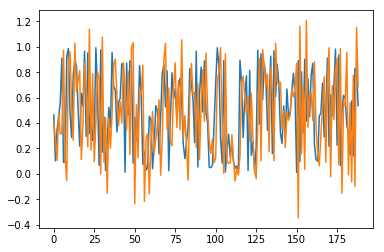

In [115]:
rmse = sqrt(mean_squared_error(a[-189:], prediction))
print('Test RMSE: %.3f' % rmse)

plt.plot(a[-189:])
plt.plot(prediction)
plt.show()
